In [16]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'no-latex'])

In [17]:
# Parameters
n_samples = 1000
n_runs = 1000 
expected_value = 0 

cumulative_averages = np.zeros(n_samples)
absolute_errors = np.zeros(n_samples)

In [18]:
# Calculate cumulative averages and absolute errors over multiple runs
for _ in range(n_runs):
    samples = np.random.randn(n_samples)
    single_run_averages = np.cumsum(samples) / np.arange(1, n_samples + 1)
    cumulative_averages += single_run_averages
    absolute_errors += (single_run_averages - expected_value)**2

cumulative_averages /= n_runs 
absolute_errors /= n_runs  

In [19]:
# Calculate the regression line for the absolute errors
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(np.arange(1, n_samples + 1)), np.log(absolute_errors))

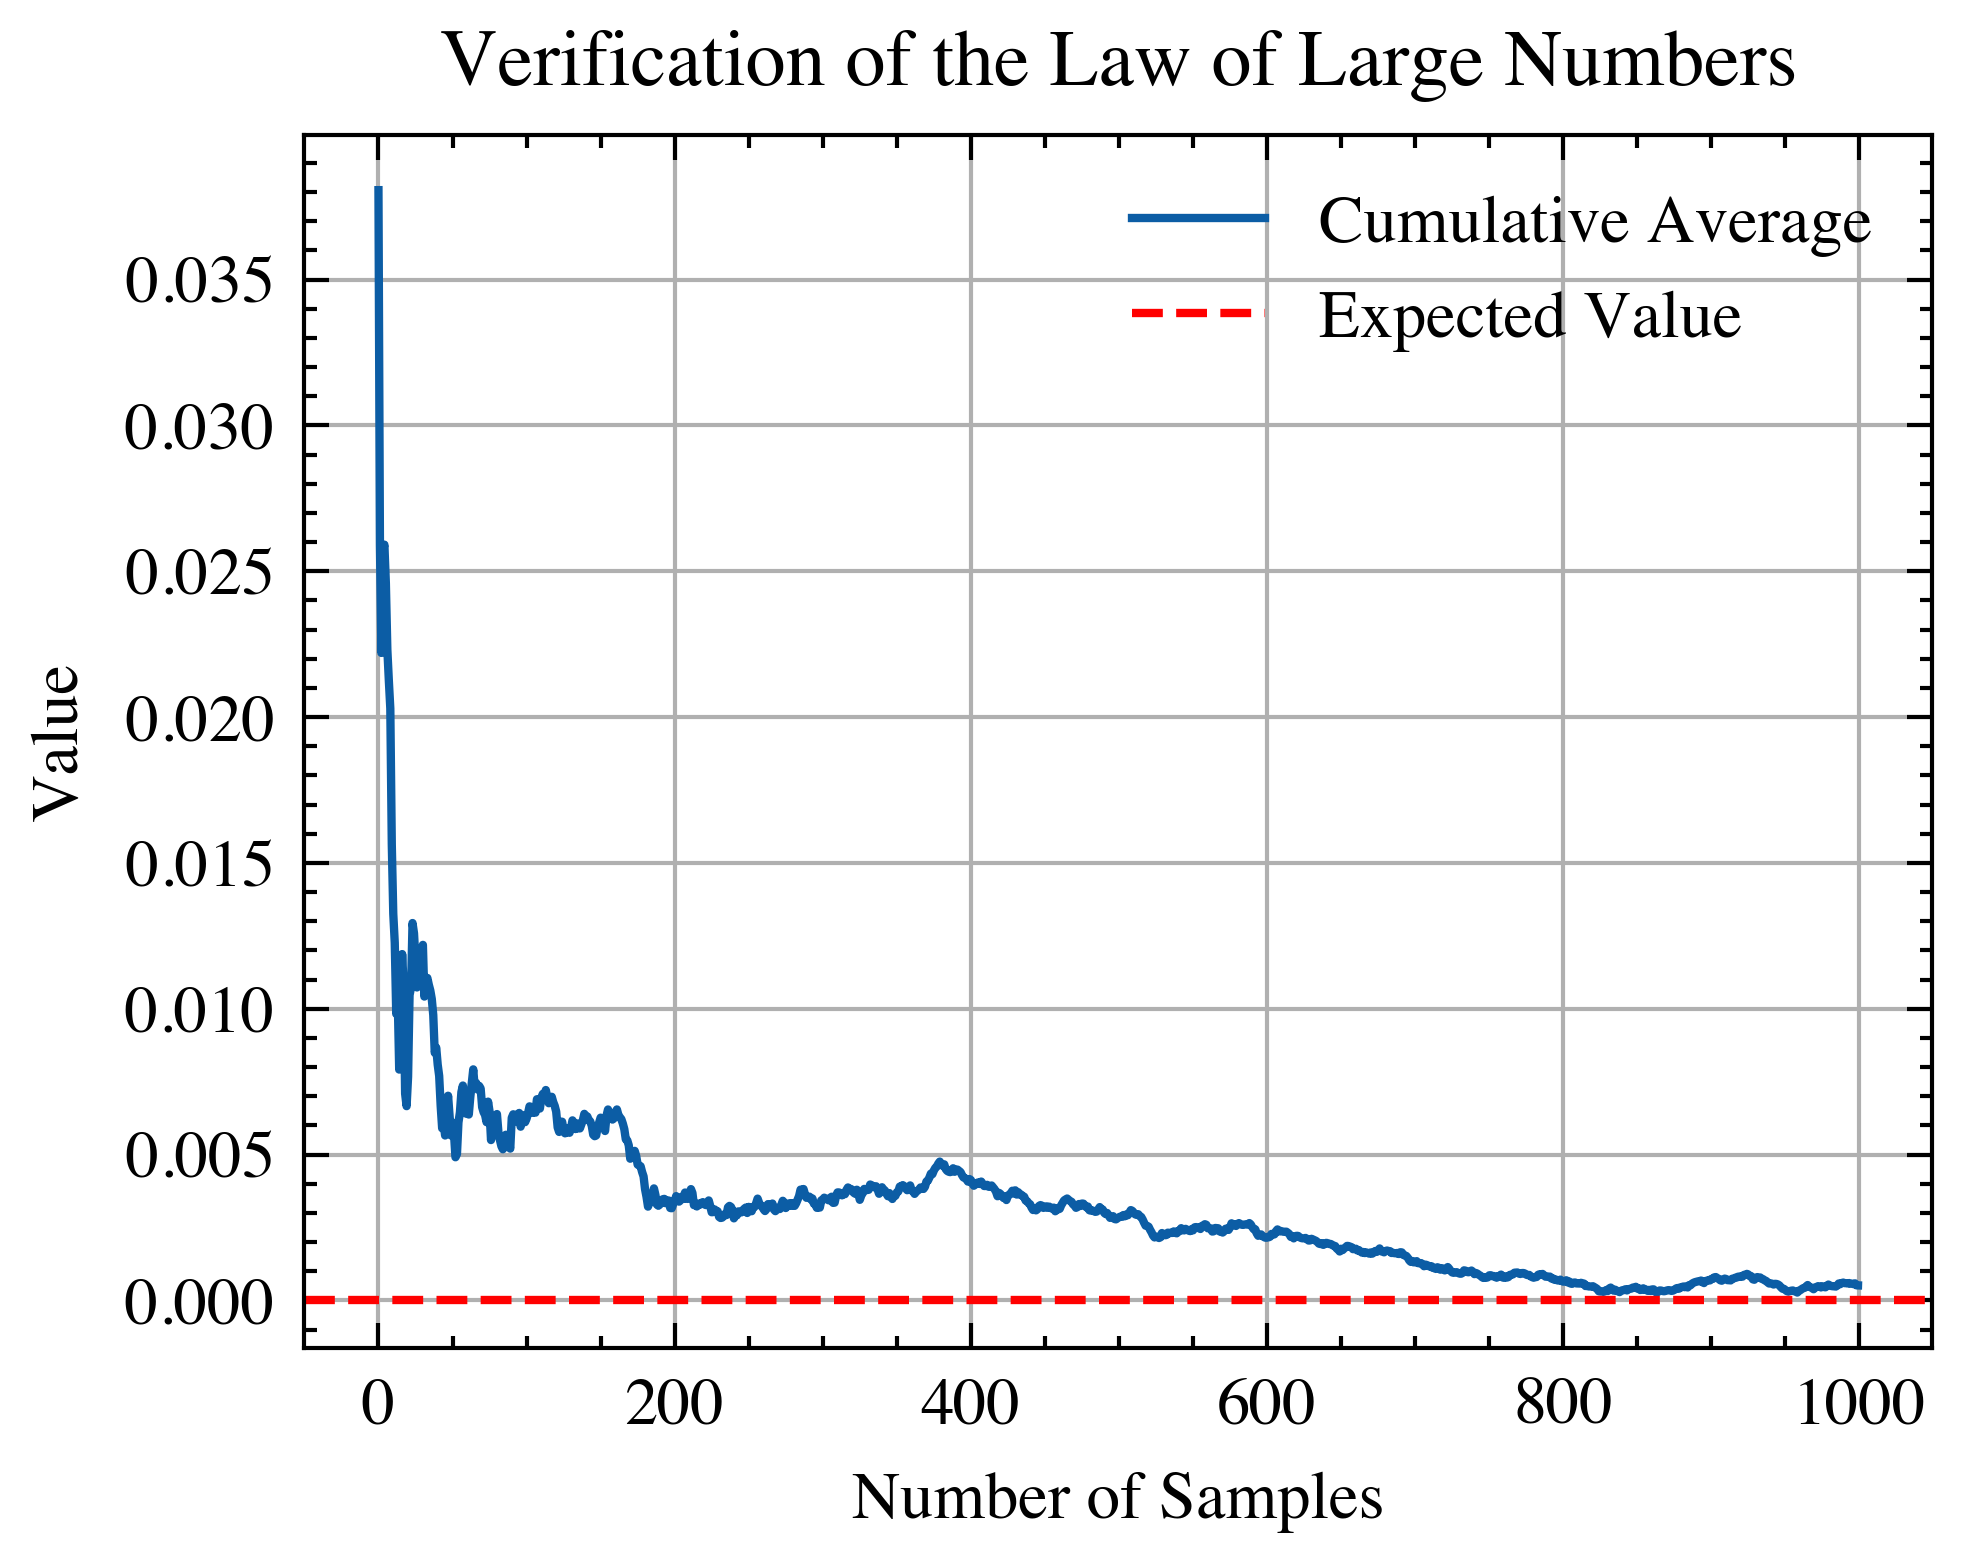

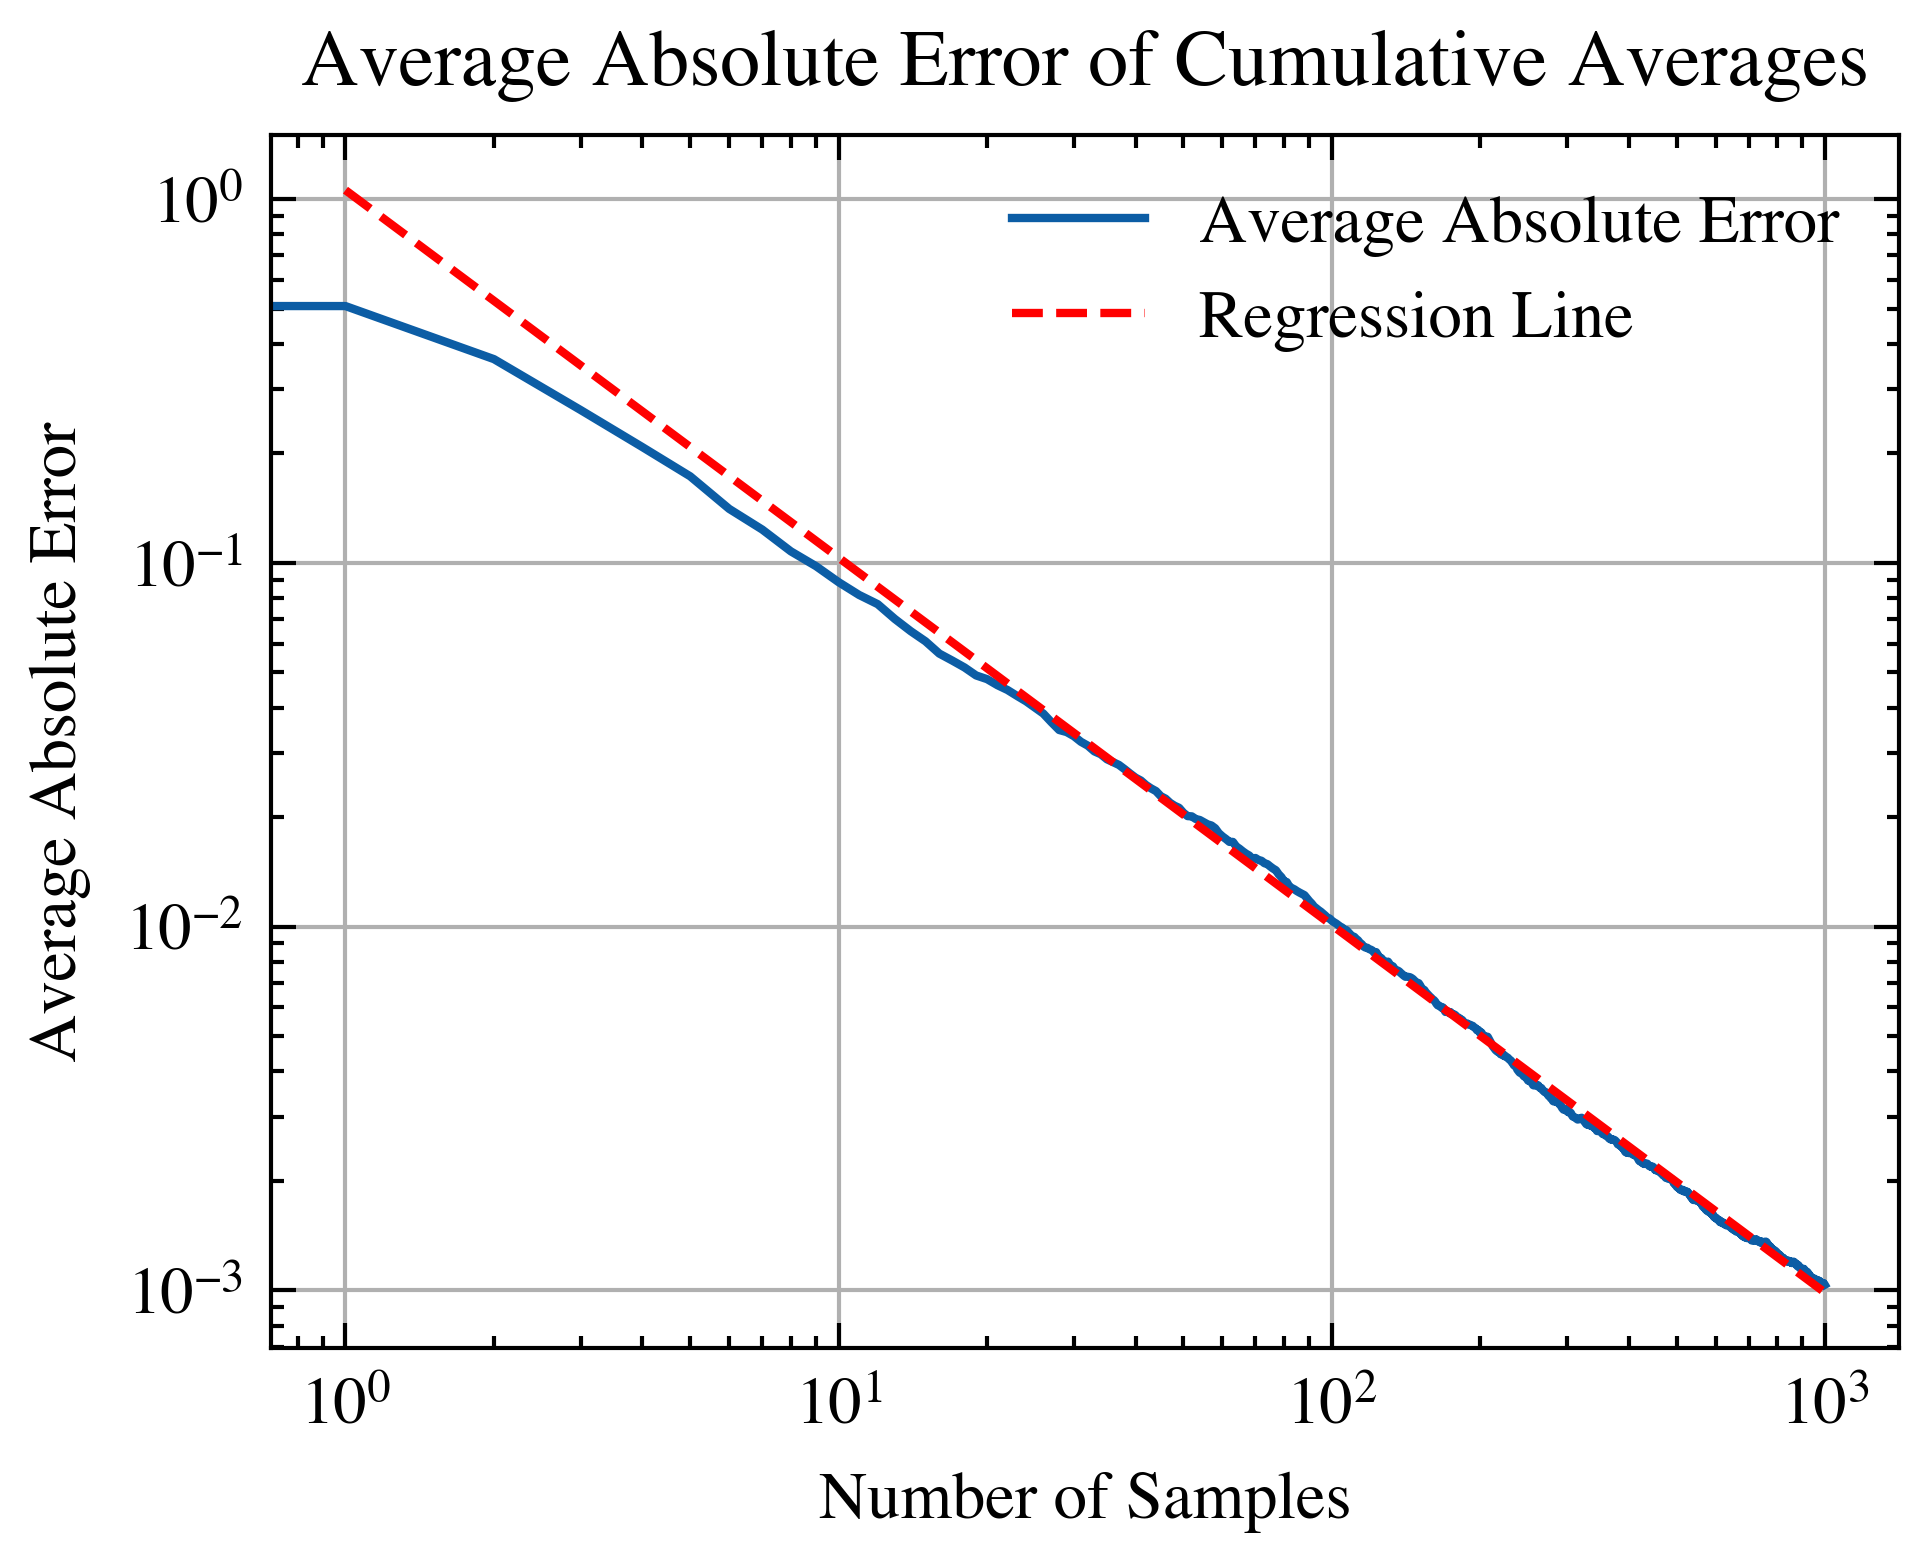

Slope of Regression Line: -1.0103057579207442


In [20]:
# Plot Cumulative Averages
plt.plot(cumulative_averages, label="Cumulative Average")
plt.axhline(y=expected_value, color='r', linestyle='--', label="Expected Value")
plt.xlabel("Number of Samples")
plt.ylabel("Value")
plt.title("Verification of the Law of Large Numbers")
plt.legend()
plt.grid(True)
plt.show()

# Plot of Average Absolute Difference and Regression Line
plt.loglog(absolute_errors, "-", label="Average Absolute Error")
plt.loglog(np.arange(1, n_samples + 1), np.exp(intercept) * np.power(np.arange(1, n_samples + 1), slope), "r--", label="Regression Line")
plt.xlabel("Number of Samples")
plt.ylabel("Average Absolute Error")
plt.title("Average Absolute Error of Cumulative Averages")
plt.legend()
plt.grid(True)
plt.show()

# Print the slope of the regression line
print("Slope of Regression Line: {}".format(slope))
